#  **PROBLEM STATEMENT**

*   CUSTOMER SEGMENTATION ANALYSIS
    
    Customer segmentation is a pattern of uncovering information about a firm's
    customer base,based on their interaction with the business. In most cases this interaction is in terms of their purchase behaviour and patterns. We explore some of the ways in which this can be used.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data= pd.read_csv('/content/drive/MyDrive/dataset/Mall_Customers.csv')

# **DATA  PREPROCESSING**

In [4]:
data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.shape

(200, 5)

In [42]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

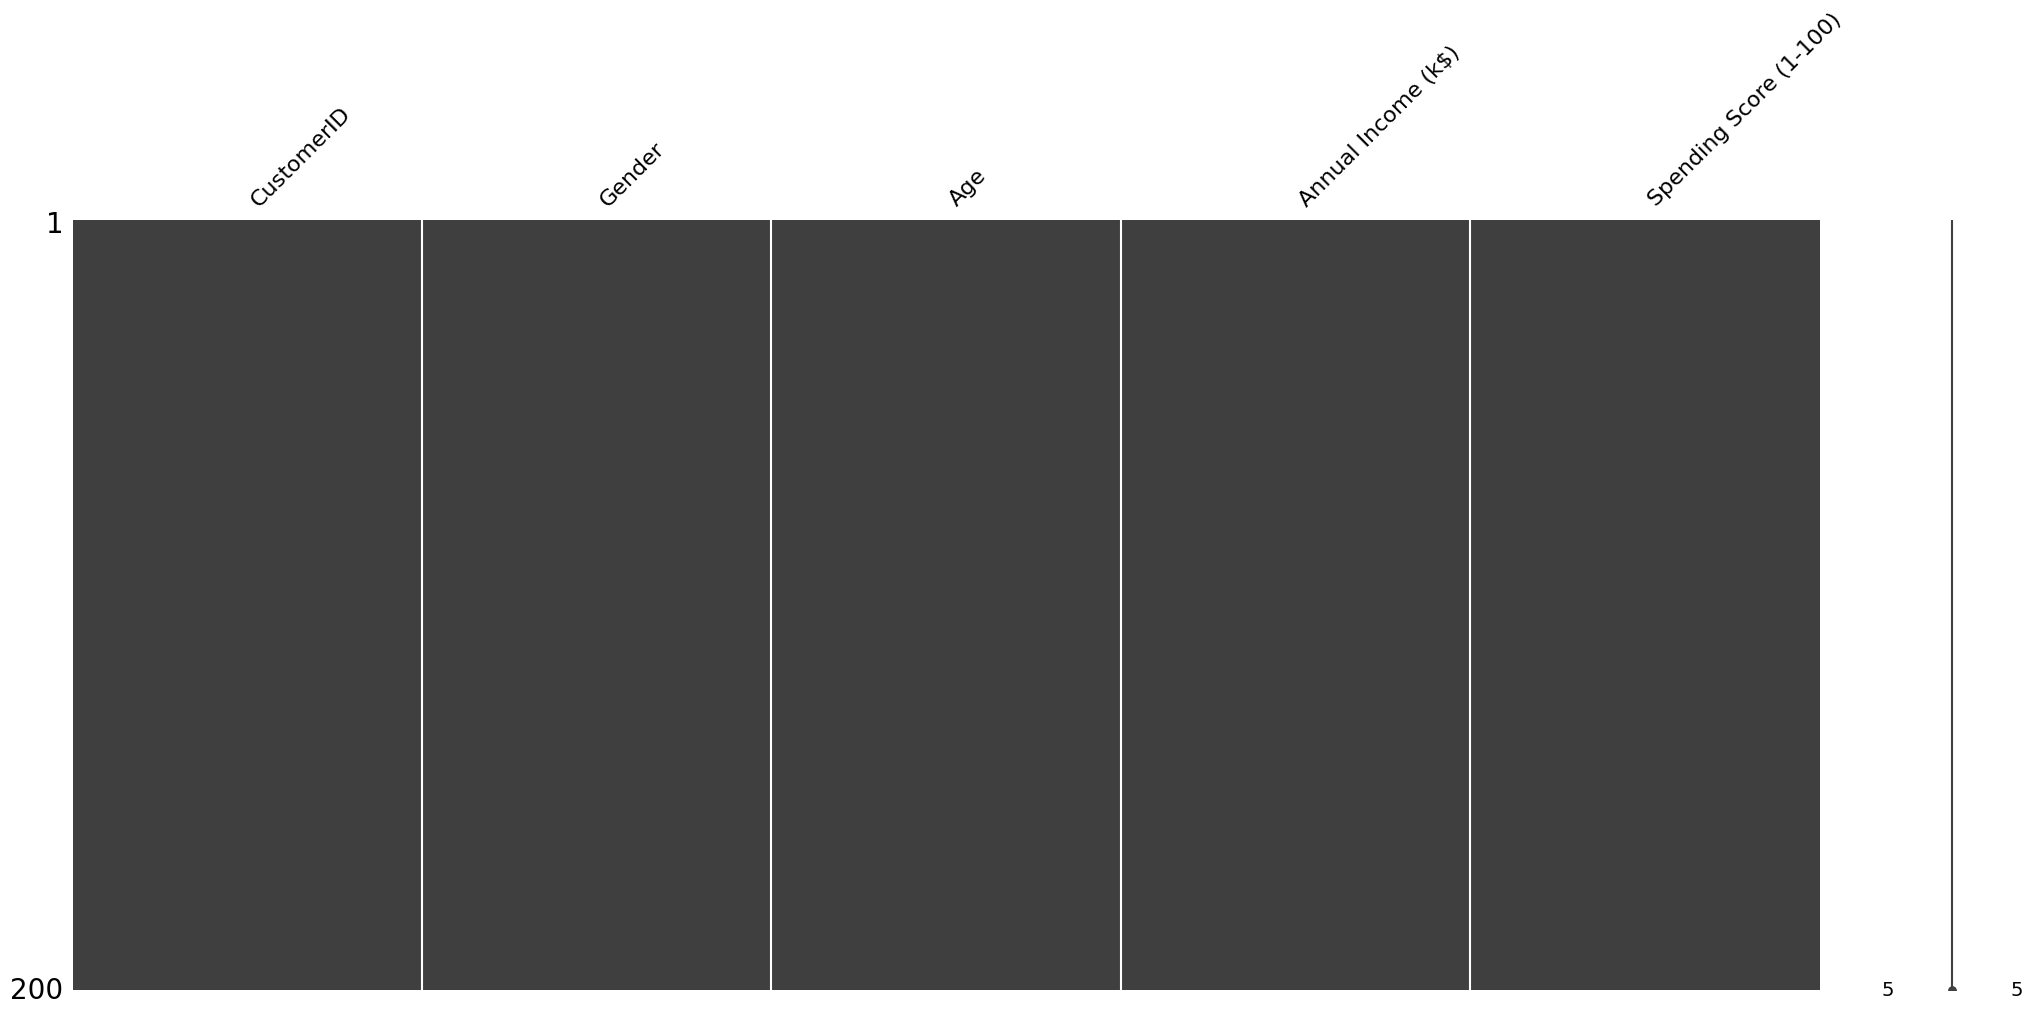

In [9]:
import missingno as msno
msno.matrix(data)

##**DATA VISUALIZATION AND EDA**

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-22-536f4059a17d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
<ipython-input-22-536f4059a17d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
<ipython-input-22-536f4059a17d>:15: UserWarning: 

`distplot` is a deprecated function and wi

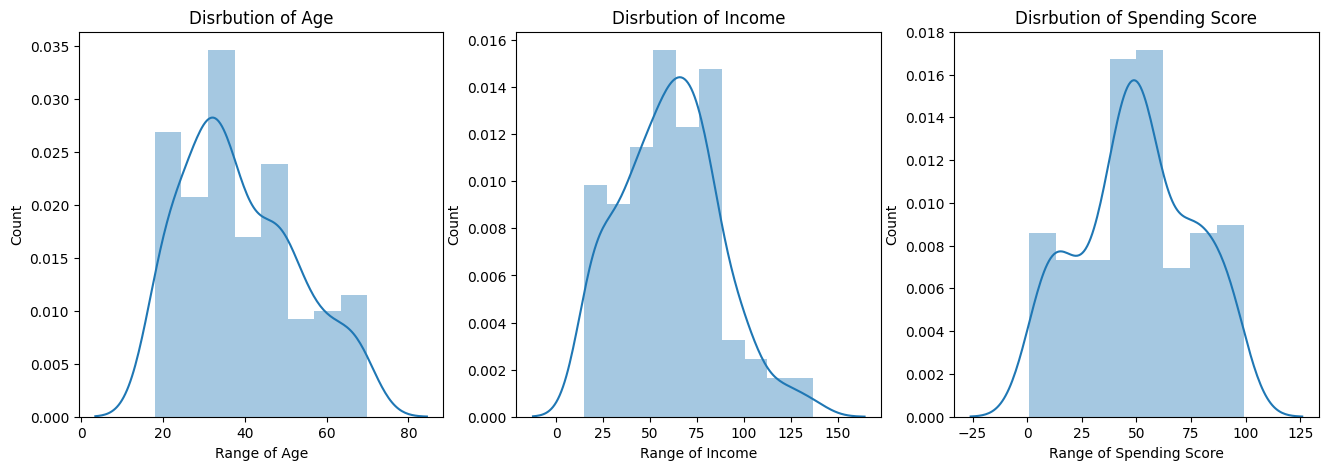

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
sns.distplot(data['Age'])
plt.title("Disrbution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3,2)
sns.distplot(data['Annual Income (k$)'])
plt.title("Disrbution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.distplot(data['Spending Score (1-100)'])
plt.title("Disrbution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()

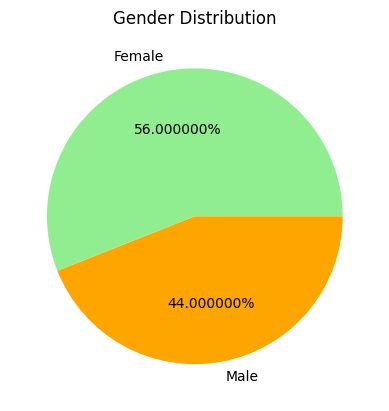

In [31]:
#pie plot
df=data.groupby('Gender').size()
df.plot(kind='pie', subplots= True,
        colors=['lightgreen','orange'],
        explode=[0,0.001],
        labels= ['Female','Male'],
        autopct="%f%%")
plt.title('Gender Distribution')
plt.show()

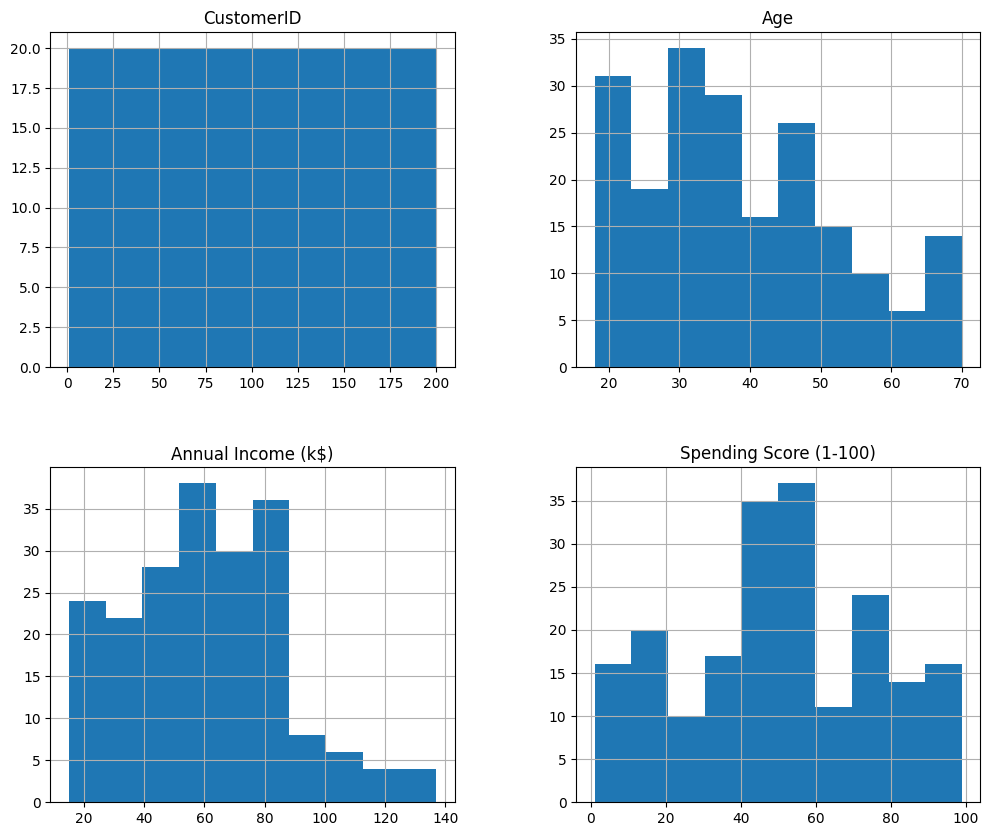

In [35]:
#histogram plot
data.hist(figsize=(12,10))
plt.show()

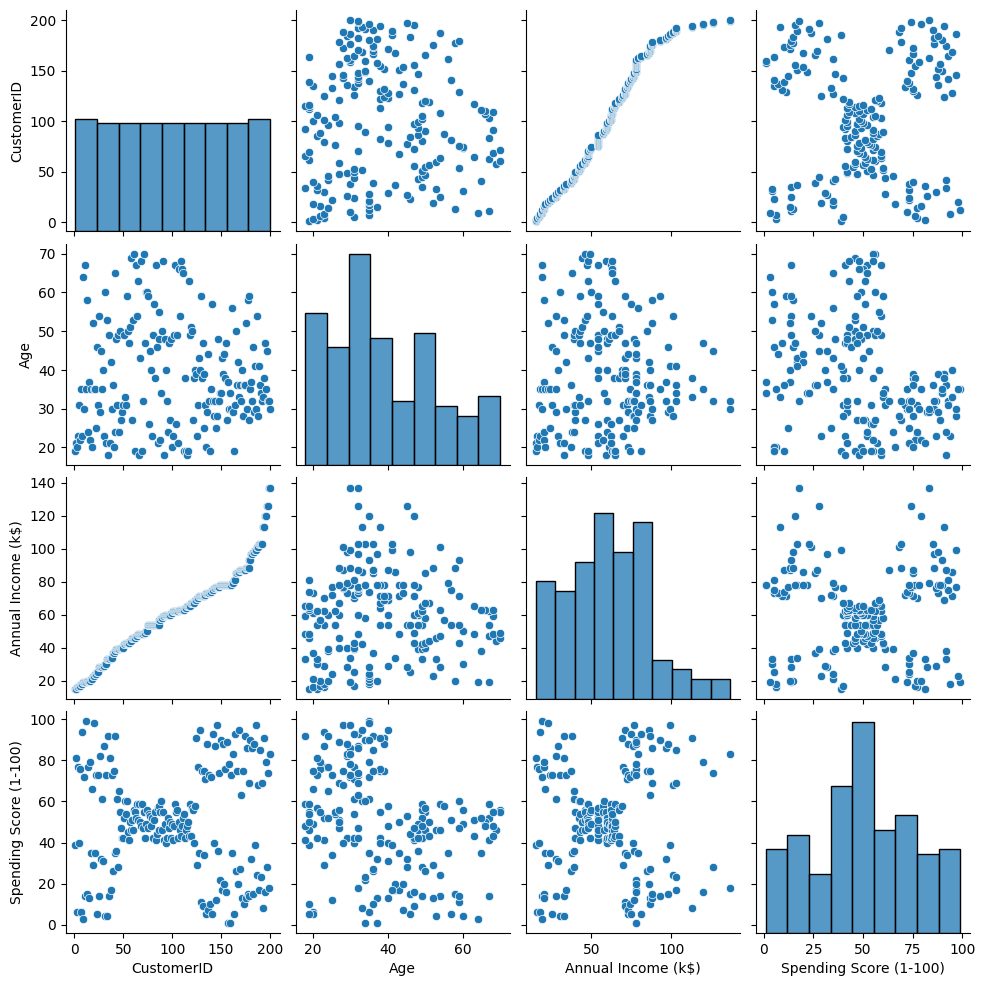

In [36]:
#plotting the pairplot
sns.pairplot(data)
plt.show()

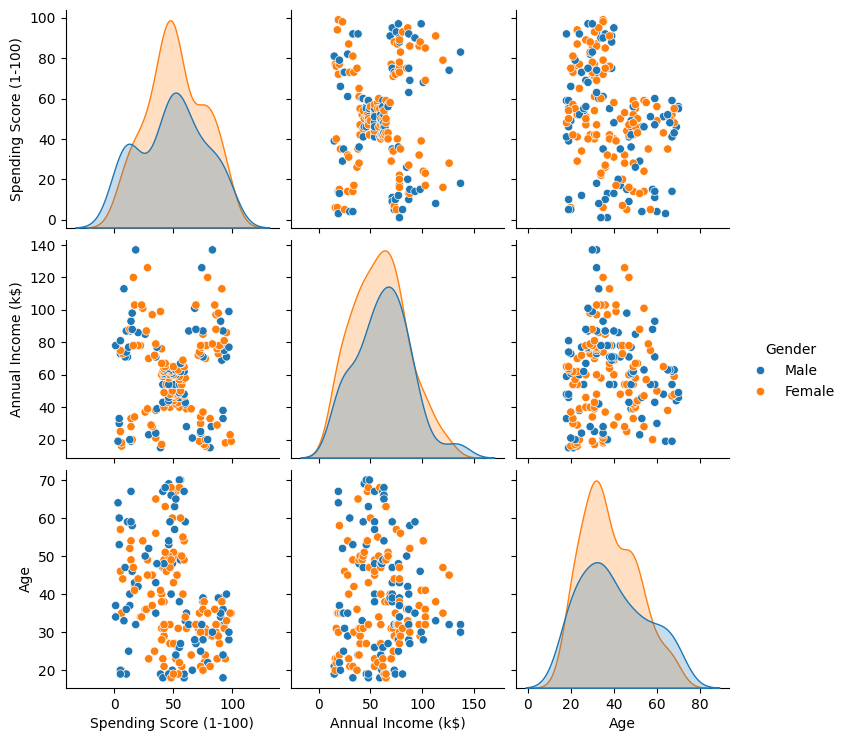

In [39]:
sns.pairplot(data,vars= ['Spending Score (1-100)','Annual Income (k$)','Age'], hue='Gender')
plt.show()

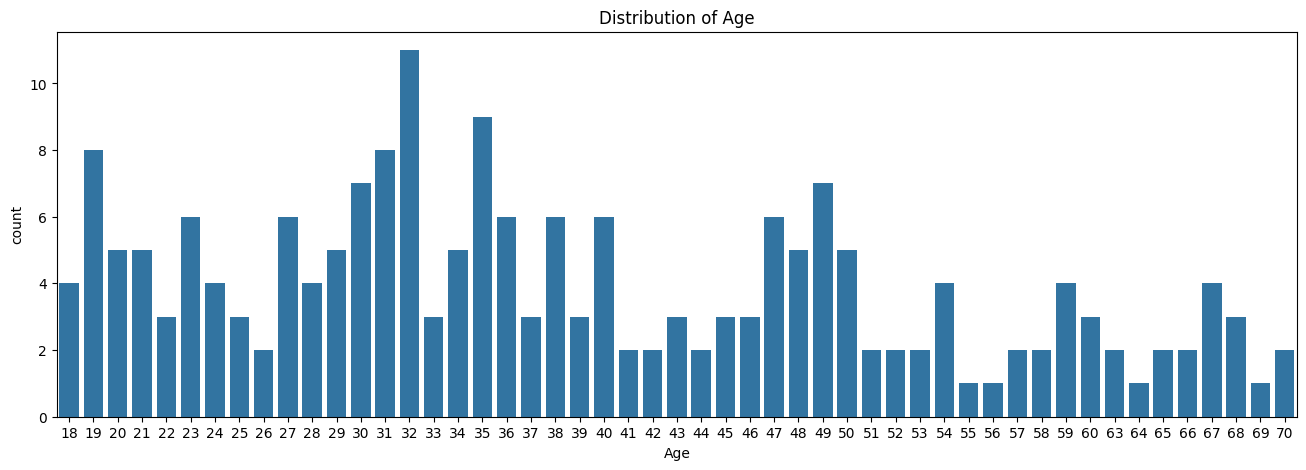

In [47]:
#counting the number of visitors in the mall with same ages
plt.figure(figsize=(16,5))
sns.countplot(x='Age',data=data)
plt.title('Distribution of Age')
plt.show()

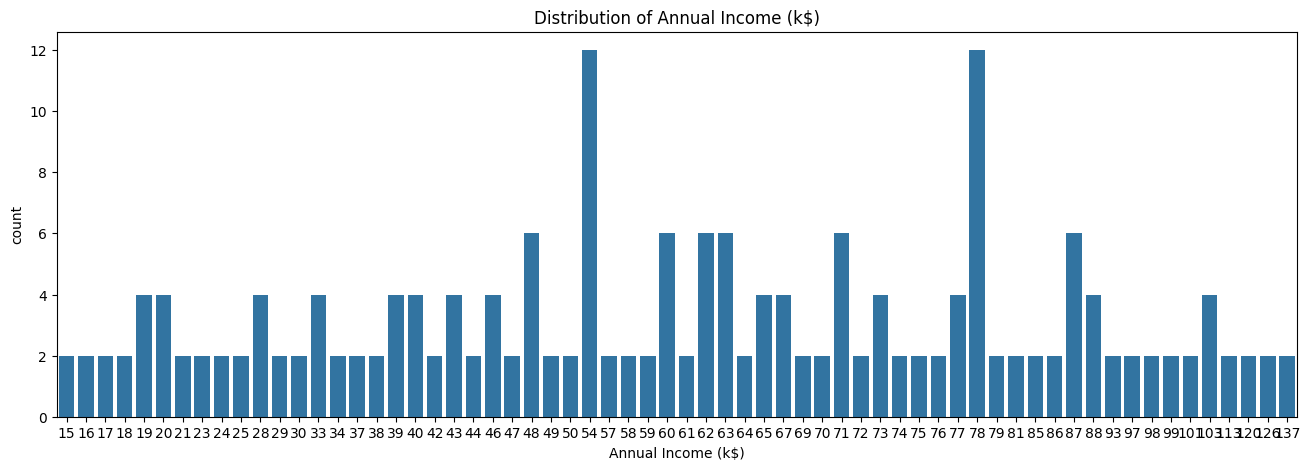

In [49]:
#counting the number of visitors in the mall with same annual income
plt.figure(figsize=(16,5))
sns.countplot(x='Annual Income (k$)',data=data)
plt.title('Distribution of Annual Income (k$)')
plt.show()

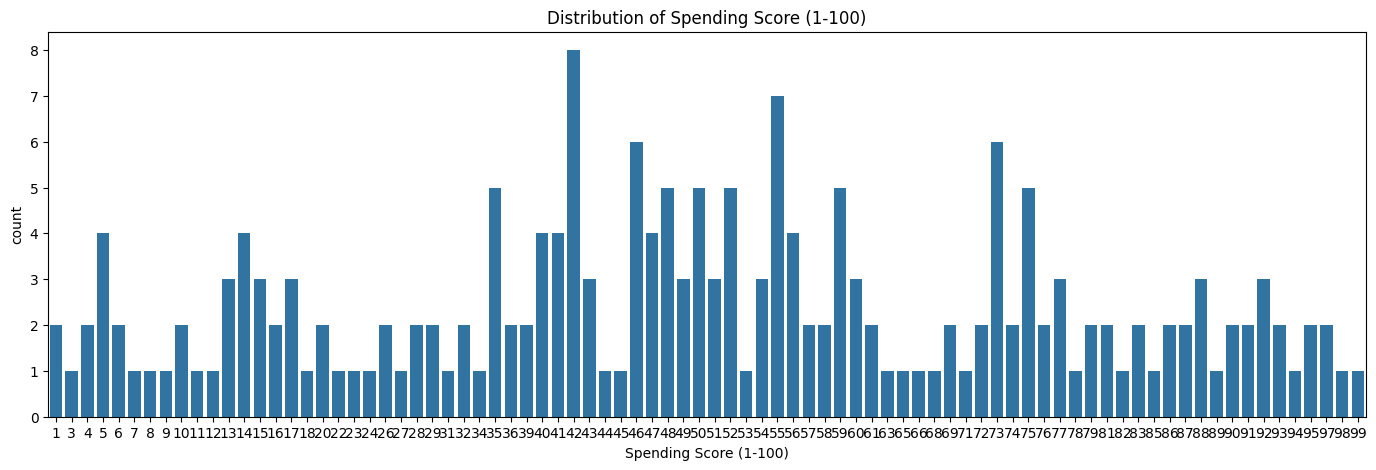

In [11]:
#counting the number of visitors in the mall with same spending scores
plt.figure(figsize=(17,5))
sns.countplot(x='Spending Score (1-100)',data=data)
plt.title('Distribution of Spending Score (1-100)')
plt.show()

In [4]:
!pip install dabl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.09E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

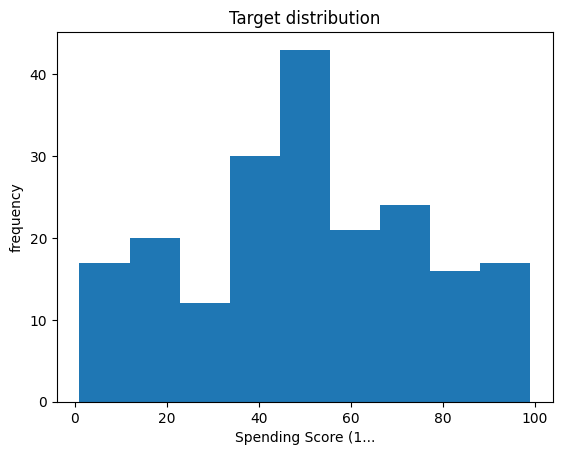

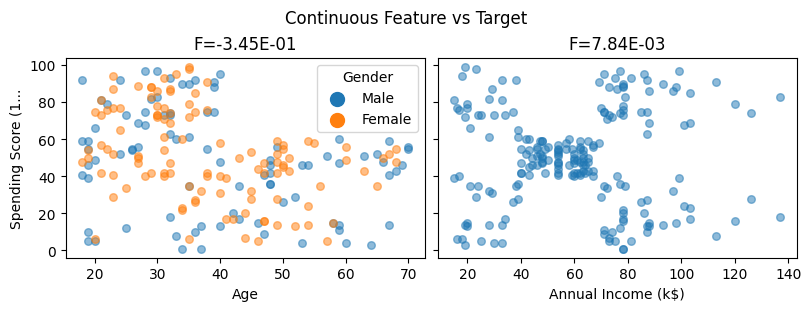

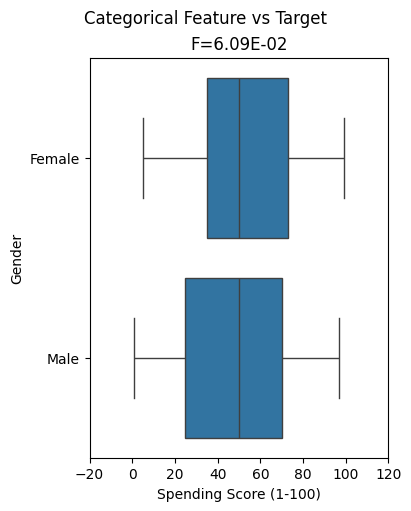

In [12]:
import dabl
dabl.plot(data,target_col='Spending Score (1-100)')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

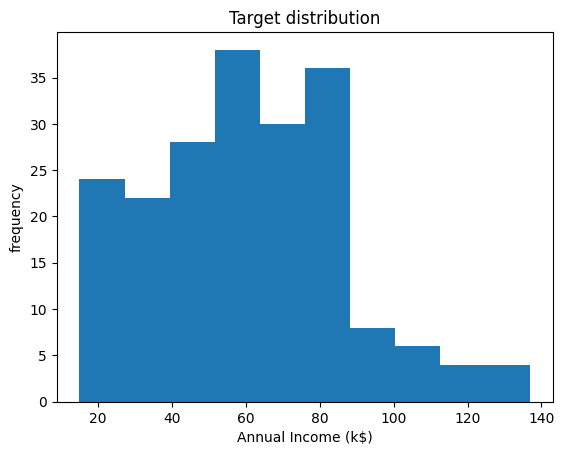

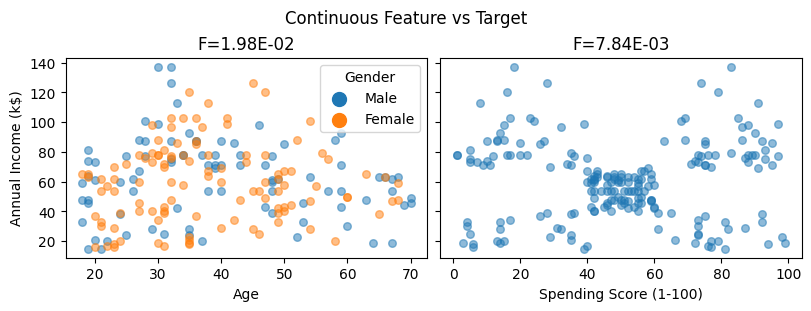

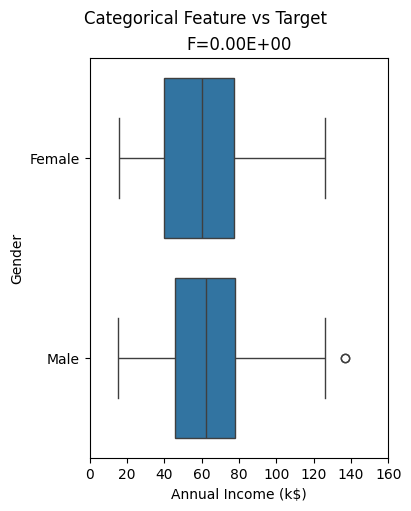

In [13]:
dabl.plot(data,target_col='Annual Income (k$)')

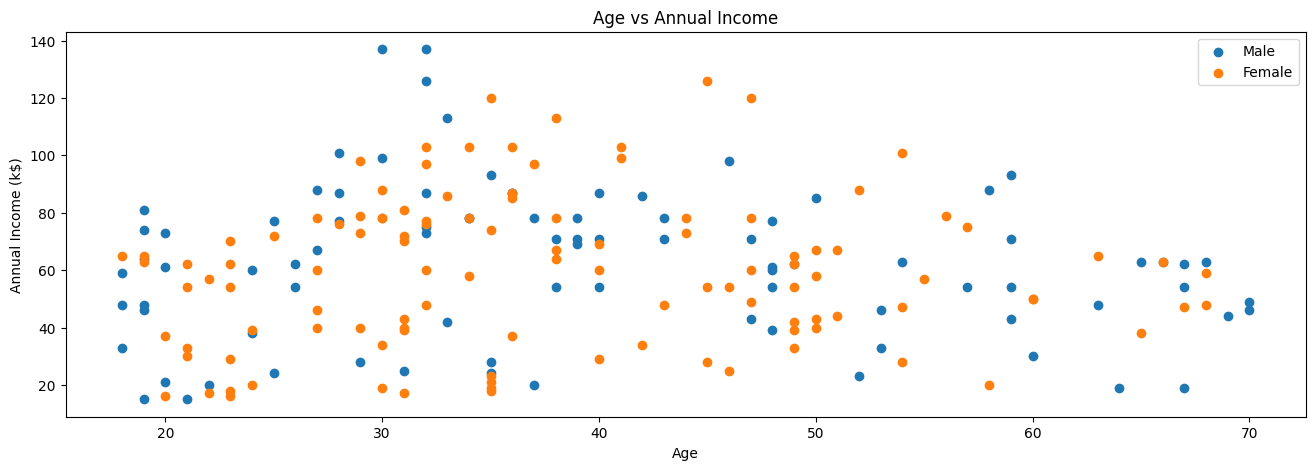

In [26]:
#preparing scatter plots to check the relationship between age vs annual income where each gender is labelled differently
plt.figure(figsize=(16,5))
for gender in ['Male','Female']:
  plt.scatter(x= 'Age',y= 'Annual Income (k$)',
              data=data[data['Gender']==gender],
              label=gender)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()


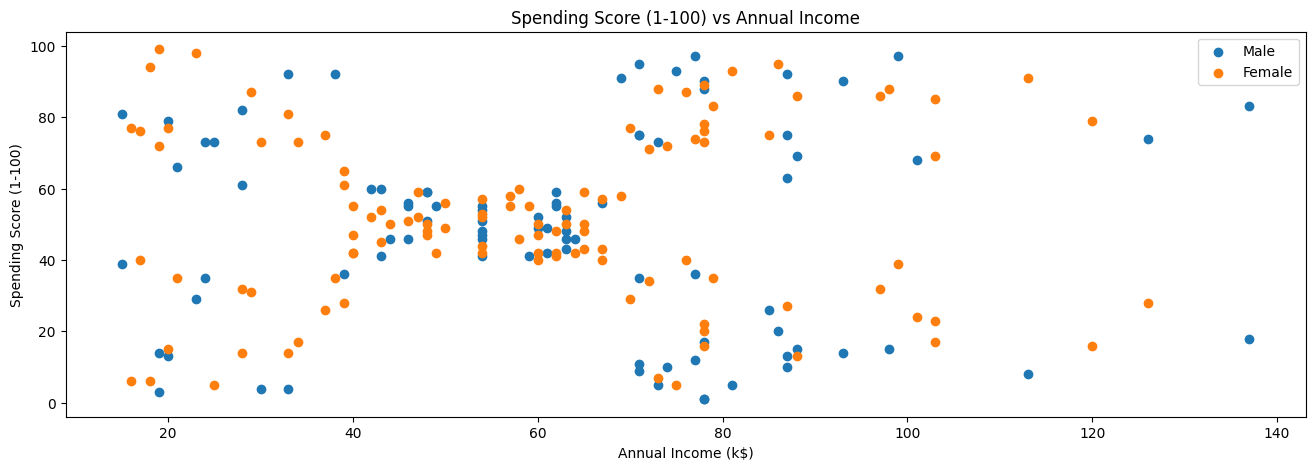

In [19]:
#preparing scatter plots to check the relationship between spending score vs annual income where each gender is labelled differently
plt.figure(figsize=(16,5))
for gender in ['Male','Female']:
  plt.scatter(y= 'Spending Score (1-100)',x= 'Annual Income (k$)',
              data=data[data['Gender']==gender],
              label=gender)
plt.title('Spending Score (1-100) vs Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.legend()

# **K-MEANS CLUSTERING**

In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets. This algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation.**

In [5]:
from sklearn.cluster import KMeans


**Elbow method**

The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [6]:
wcss=[]
for i in range(1,11):
  km= KMeans(n_clusters=i)
  km.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [7]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25043.89004329005,
 21850.165282585636,
 19636.753964898147]

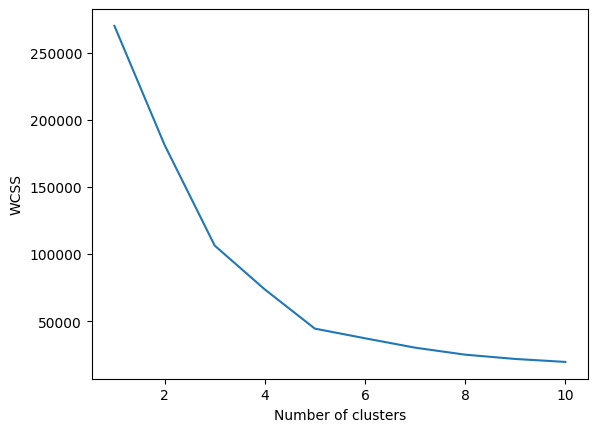

In [8]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow method suggests 5 clusters.

In [13]:
X=data.iloc[:,[3,4]].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

**Plotting all the clusters and their centroids**

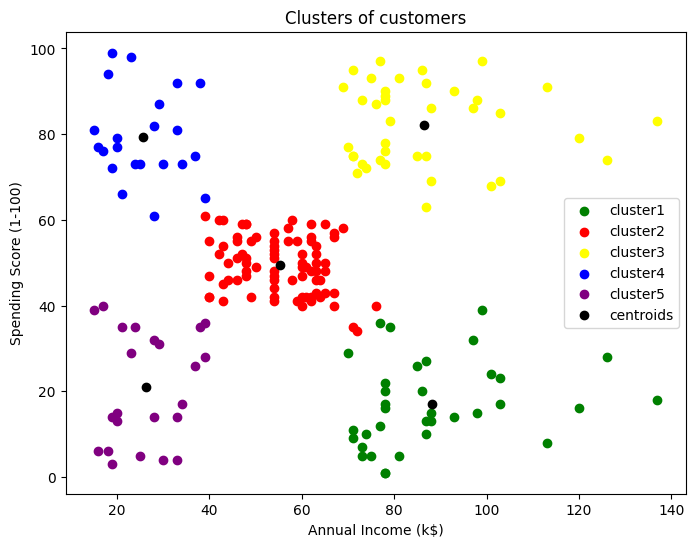

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='green',label='cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='red',label='cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='yellow',label='cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='blue',label='cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color='purple',label='cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroids')
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.show()
